In [105]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
cov = np.array([[0.010, 0.002, 0.001], [0.002, 0.011, 0.003], [0.001, 0.003, 0.020]])
r = np.array([0.0427,0.0015, 0.0285])
ass_var = np.array([0.010, 0.011, 0.020])

def var(z):
    w1 = z[0]
    w2 = z[1]
    w3 = z[2]
    
    w = np.array([w1, w2, w3])
    f = np.zeros(1)
    f[0] = np.matmul(np.matmul(w,cov),w.T)
    return f

def constr1(z):
    w1 = z[0]
    w2 = z[1]
    w3 = z[2]
    
    w = np.array([w1, w2, w3])
    ret = np.matmul(w,r.T)
    t = (r[1] + r[2]) / 2   
    f = np.zeros(2)
    f[0] = w1 + w2 + w3 -1
    f[1] = ret - t
    return f
cons1 = {'type' : 'eq', 'fun': constr1}
P1 = minimize(var, (1, 0, 1), method='SLSQP',constraints = cons1)
P1_var = P1.fun
P1_ret = np.matmul(P1.x,r.T)  
P1_ret
#P1

0.015000000001184052

In [100]:
import numpy as np
from scipy.optimize import minimize

cov = np.array([[0.010, 0.002, 0.001], [0.002, 0.011, 0.003], [0.001, 0.003, 0.020]])
r = np.array([0.0427,0.0015, 0.0285])

def var(z):
    w1 = z[0]
    w2 = z[1]
    w3 = z[2]
    
    w = np.array([w1, w2, w3])
    f = np.zeros(1)
    f[0] = np.matmul(np.matmul(w,cov),w.T)
    return f

def constr(z):
    w1 = z[0]
    w2 = z[1]
    w3 = z[2]
    
    w = np.array([w1, w2, w3])
    ret = np.matmul(w,r.T)
    t = r[0]   
    f = np.zeros(2)
    f[0] = w1 + w2 + w3 -1
    f[1] = ret - t
    return f
cons = {'type' : 'eq', 'fun': constr}
P2 = minimize(var, (1, 0, 1), method='SLSQP',constraints = cons)
P2_var = P2.fun
P2_ret = np.matmul(P2.x,r.T)
P2_ret
#P2

0.042700000035385828

In [123]:
import numpy as np
from scipy.optimize import minimize

cov = np.array([[0.010, 0.002, 0.001], [0.002, 0.011, 0.003], [0.001, 0.003, 0.020]])
r = np.array([0.0427,0.0015, 0.0285])

def var(z):
    w1 = z[0]
    w2 = z[1]
    w3 = z[2]
    
    w = np.array([w1, w2, w3])
    f = np.zeros(1)
    f[0] = np.matmul(np.matmul(w,cov),w.T)
    return f

def constr(z):
    w1 = z[0]
    w2 = z[1]
    w3 = z[2]
    
    w = np.array([w1, w2, w3])   
    f = np.zeros(1)
    f[0] = w1 + w2 + w3 -1
    return f

cons = {'type' : 'eq', 'fun': constr}
gmin = minimize(var, (1, 0, 1), method='SLSQP',constraints = cons)
gminvar_var = gmin.fun
gminvar_ret = np.matmul(gmin.x,r.T)


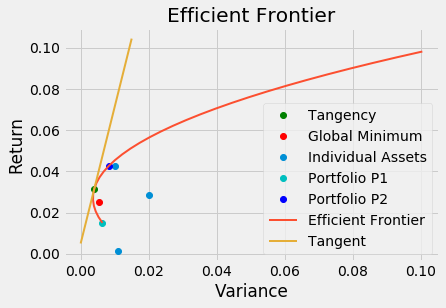

In [159]:
a=np.linspace(-2 , 1, num = 31)
b = 1-a
weight = np.array([a, b])
fund_r = np.array([P1_ret, P2_ret])
fund_v = np.array([[P1_var, 0],[0, P2_var]])
eff_ret = list()
#wei = np.array([a[2],b[2]])
eff_var = list()
#np.matmul(wei.T,fund_r)

for i in range(0,len(a)):
    wei = np.array([a[i],b[i]])
    fund_ret = np.matmul(wei,fund_r.T)
    eff_ret.append(fund_ret)
    fund_var = np.matmul(np.matmul(wei,fund_v.T),wei.T)
    eff_var.append(fund_var)
 
rf = 0.005
sharp = ((np.array(eff_ret)-rf)/np.array(eff_var))
pos, =np.where(sharp == max(sharp))
vectvar = (eff_var[pos[0]],0)
vectret = (eff_ret[pos[0]], rf)

def tang(t):
    y = max(sharp) * t + rf
    return y 

t = np.linspace(0 , 0.015, num = 10)


plt.plot(eff_var[pos[0]],eff_ret[pos[0]],'go',label = 'Tangency')
plt.plot(gminvar_var,gminvar_ret,'ro', label='Global Minimum')
plt.plot(ass_var,r,'o', label='Individual Assets')
plt.plot(P1_var,P1_ret, 'co',label='Portfolio P1')
plt.plot(P2_var,P2_ret, 'bo',label='Portfolio P2')
plt.plot(eff_var,eff_ret,label = 'Efficient Frontier', linewidth = 2)
plt.plot(t,tang(t),label = 'Tangent', linewidth = 2)
plt.xlabel('Variance')
plt.ylabel('Return')
plt.legend()
plt.title('Efficient Frontier')
plt.show()